In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [90]:
income_data = pd.read_csv('income_case_study.csv', sep = ';', engine = 'python')

In [91]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
age                44693 non-null float64
workclass          45222 non-null object
education_level    44685 non-null object
education-num      41689 non-null float64
marital-status     45222 non-null object
Name               45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
native-country     45222 non-null object
income             39663 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 3.5+ MB


In [11]:
income_data.head()

,age,workclass,education_level,education-num,marital-status,Name,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17.0,Private,11th,7.0,Never-married,Karen,Sales,Own-child,White,Female,0,0,24,United-States,NaN
1,18.0,Private,12th,8.0,Never-married,Karen,Machine-op-inspct,Own-child,White,Male,0,0,30,United-States,NaN
2,18.0,Private,Some-college,10.0,Never-married,Karen,Other-service,Own-child,White,Female,0,0,20,United-States,NaN
3,19.0,Private,Some-college,10.0,Never-married,Billie,Adm-clerical,Own-child,White,Male,0,0,30,United-States,NaN
4,21.0,Private,Some-college,10.0,Never-married,Audrey,Other-service,Not-in-family,White,Female,0,0,35,United-States,NaN


In [92]:
totalnum = income_data.shape[0]
print(totalnum)

45222


In [93]:
morethan50 = income_data[income_data['income'] == '>50K'].shape[0]

In [94]:
print(morethan50)

11208


In [95]:
lessthan50 = income_data[income_data['income'] == '<=50K'].shape[0]
print(lessthan50)

28455


In [96]:
percentage_of_morethan50 = ((morethan50 / totalnum)* 100)
print(percentage_of_morethan50)

24.78439697492371


In [97]:
sns.set()

C:\Users\U090167\Python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\U090167\Python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


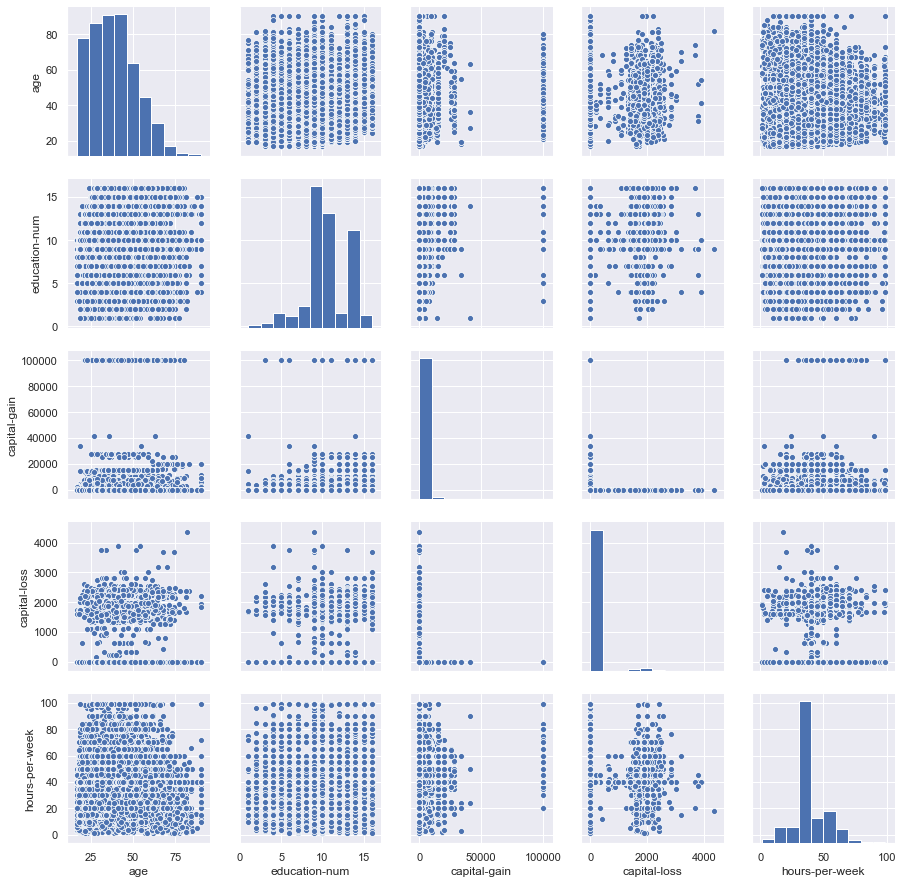

In [98]:
sns.pairplot(income_data)

In [99]:
income_dist = income_data['income']
others = income_data.drop('income', axis = 1)

In [100]:
print(income_data)

        age          workclass education_level  education-num  \
0      17.0            Private            11th            7.0   
1      18.0            Private            12th            8.0   
2      18.0            Private    Some-college           10.0   
3      19.0            Private    Some-college           10.0   
4      21.0            Private    Some-college           10.0   
...     ...                ...             ...            ...   
45217  57.0          Local-gov         HS-grad            9.0   
45218  57.0   Self-emp-not-inc         Masters           14.0   
45219  61.0            Private         7th-8th            4.0   
45220  66.0            Private            10th            6.0   
45221  73.0   Self-emp-not-inc    Some-college           10.0   

            marital-status    Name          occupation    relationship  \
0            Never-married   Karen               Sales       Own-child   
1            Never-married   Karen   Machine-op-inspct       Own-child 

In [101]:
income_data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'Name', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [102]:
income_data.dropna(how='any',inplace=True)

In [103]:
print(income_data)

        age          workclass education_level  education-num  \
14     31.0            Private       Bachelors           13.0   
18     33.0            Private         Masters           14.0   
20     36.0            Private         HS-grad            9.0   
21     38.0            Private       Bachelors           13.0   
22     38.0          State-gov    Some-college           10.0   
...     ...                ...             ...            ...   
45217  57.0          Local-gov         HS-grad            9.0   
45218  57.0   Self-emp-not-inc         Masters           14.0   
45219  61.0            Private         7th-8th            4.0   
45220  66.0            Private            10th            6.0   
45221  73.0   Self-emp-not-inc    Some-college           10.0   

               marital-status     Name          occupation    relationship  \
14         Married-civ-spouse  Johanna      Prof-specialty         Husband   
18         Married-civ-spouse  Johanna      Prof-specialty     

In [104]:
for c in income_data.columns:
    print ("-- %s --" % c)
    print (income_data[c].value_counts())

-- age --
35.0    1012
36.0    1001
38.0     987
33.0     980
34.0     972
        ... 
88.0       4
85.0       3
87.0       1
89.0       1
86.0       1
Name: age, Length: 74, dtype: int64
-- workclass --
 Private             25746
 Self-emp-not-inc     2963
 Local-gov            2429
 State-gov            1533
 Self-emp-inc         1331
 Federal-gov          1130
 Without-pay            16
Name: workclass, dtype: int64
-- education_level --
 HS-grad         11227
 Some-college     7643
 Bachelors        6114
 Masters          2071
 Assoc-voc        1541
 11th             1202
 Assoc-acdm       1172
 10th              914
 Prof-school       673
 7th-8th           619
 9th               518
 Doctorate         483
 12th              431
 5th-6th           327
 1st-4th           158
 Preschool          55
Name: education_level, dtype: int64
-- education-num --
9.0     11227
10.0     7643
13.0     6114
14.0     2071
11.0     1541
7.0      1202
12.0     1172
6.0       914
15.0      673
4.0 

In [105]:
income_data.drop(['hours-per-week' , 'capital-loss', 'capital-gain','age','native-country','Name'], axis=1, inplace = True)

In [106]:
#need to replace string values with integer values.
income_data['income'] = income_data['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [107]:
print(income_data)

               workclass education_level  education-num  \
14               Private       Bachelors           13.0   
18               Private         Masters           14.0   
20               Private         HS-grad            9.0   
21               Private       Bachelors           13.0   
22             State-gov    Some-college           10.0   
...                  ...             ...            ...   
45217          Local-gov         HS-grad            9.0   
45218   Self-emp-not-inc         Masters           14.0   
45219            Private         7th-8th            4.0   
45220            Private            10th            6.0   
45221   Self-emp-not-inc    Some-college           10.0   

               marital-status          occupation    relationship  \
14         Married-civ-spouse      Prof-specialty         Husband   
18         Married-civ-spouse      Prof-specialty         Husband   
20      Married-spouse-absent      Prof-specialty       Unmarried   
21         Marr

In [108]:
print(income_data['workclass'])

14                 Private
18                 Private
20                 Private
21                 Private
22               State-gov
               ...        
45217            Local-gov
45218     Self-emp-not-inc
45219              Private
45220              Private
45221     Self-emp-not-inc
Name: workclass, Length: 35148, dtype: object


In [109]:
income_data['workclass'].value_counts()

 Private             25746
 Self-emp-not-inc     2963
 Local-gov            2429
 State-gov            1533
 Self-emp-inc         1331
 Federal-gov          1130
 Without-pay            16
Name: workclass, dtype: int64

In [110]:
income_data['workclass'] = income_data['workclass'].map({' Self-emp-inc': 0, ' State-gov': 1,' Federal-gov': 2, ' Without-pay': 3, ' Local-gov': 4,' Private': 5, ' Self-emp-not-inc': 6}).astype(int)

In [111]:
income_data['education_level'].value_counts()

 HS-grad         11227
 Some-college     7643
 Bachelors        6114
 Masters          2071
 Assoc-voc        1541
 11th             1202
 Assoc-acdm       1172
 10th              914
 Prof-school       673
 7th-8th           619
 9th               518
 Doctorate         483
 12th              431
 5th-6th           327
 1st-4th           158
 Preschool          55
Name: education_level, dtype: int64

In [112]:
income_data['education_level'] =  income_data['education_level'].map({' Some-college': 0, ' Preschool': 1, ' 5th-6th': 2, ' HS-grad': 3, ' Masters': 4, ' 12th': 5, ' 7th-8th': 6, ' Prof-school': 7,' 1st-4th': 8, ' Assoc-acdm': 9, ' Doctorate': 10, ' 11th': 11,' Bachelors': 12, ' 10th': 13,' Assoc-voc': 14,' 9th': 15}).astype(int)


In [113]:
income_data['education-num'].value_counts()

9.0     11227
10.0     7643
13.0     6114
14.0     2071
11.0     1541
7.0      1202
12.0     1172
6.0       914
15.0      673
4.0       619
5.0       518
16.0      483
8.0       431
3.0       327
2.0       158
1.0        55
Name: education-num, dtype: int64

In [114]:
income_data['marital-status'].value_counts()

 Married-civ-spouse       17063
 Never-married            10867
 Divorced                  4750
 Separated                 1074
 Widowed                    952
 Married-spouse-absent      418
 Married-AF-spouse           24
Name: marital-status, dtype: int64

In [115]:
income_data['marital-status'] = income_data['marital-status'].map({' Married-spouse-absent': 0, ' Widowed': 1, ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4,' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [116]:
#income_data['Name'].value_counts()

In [117]:
#income_data['Name'] = income_data['Name'].map({'Karen': 0, 'Audrey': 1,'Billie': 2,'Johanna': 3, 'Bernie':4 }).astype(int)

In [118]:
income_data['occupation'].value_counts()

 Exec-managerial      4901
 Prof-specialty       4849
 Craft-repair         4663
 Sales                4211
 Adm-clerical         4207
 Other-service        3553
 Machine-op-inspct    2205
 Transport-moving     1791
 Handlers-cleaners    1544
 Farming-fishing      1137
 Tech-support         1131
 Protective-serv       772
 Priv-house-serv       171
 Armed-Forces           13
Name: occupation, dtype: int64

In [119]:
income_data['occupation'] = income_data['occupation'].map({ ' Farming-fishing': 0, ' Tech-support': 1, ' Adm-clerical': 2, ' Handlers-cleaners': 3, 
' Prof-specialty': 4,' Machine-op-inspct': 5, ' Exec-managerial': 6,' Priv-house-serv': 7,' Craft-repair': 8,' Sales': 9, ' Transport-moving': 10, ' Armed-Forces': 11, ' Other-service': 12,' Protective-serv':13}).astype(int)

In [120]:
income_data['relationship'].value_counts()

 Husband           15122
 Not-in-family      8878
 Own-child          4860
 Unmarried          3582
 Wife               1720
 Other-relative      986
Name: relationship, dtype: int64

In [121]:
income_data['relationship'] = income_data['relationship'].map({' Not-in-family': 0, ' Wife': 1, ' Other-relative': 2, ' Unmarried': 3,' Husband': 4,' Own-child': 5}).astype(int)

In [122]:
income_data['race'].value_counts()

 White                 30302
 Black                  3231
 Asian-Pac-Islander     1023
 Amer-Indian-Eskimo      318
 Other                   274
Name: race, dtype: int64

In [123]:
income_data['race'] = income_data['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, ' Amer-Indian-Eskimo': 4}).astype(int)

In [124]:
income_data['sex'].value_counts()

 Male      24021
 Female    11127
Name: sex, dtype: int64

In [125]:
income_data['sex'] = income_data['sex'].map({' Male': 0, ' Female': 1}).astype(int);

In [126]:
print(income_data)

       workclass  education_level  education-num  marital-status  occupation  \
14             5               12           13.0               2           4   
18             5                4           14.0               2           4   
20             5                3            9.0               0           4   
21             5               12           13.0               2           9   
22             1                0           10.0               2          13   
...          ...              ...            ...             ...         ...   
45217          4                3            9.0               4          13   
45218          6                4           14.0               2           1   
45219          5                6            4.0               2           5   
45220          5               13            6.0               1          12   
45221          6                0           10.0               1           0   

       relationship  race  sex  income 

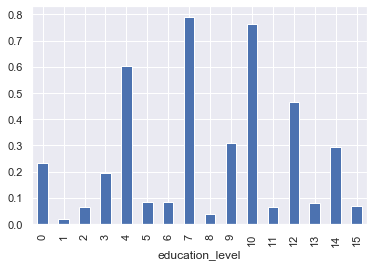

In [127]:
income_data.groupby('education_level').income.mean().plot(kind='bar')

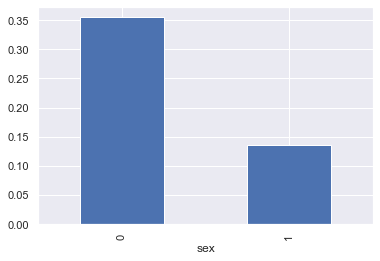

In [128]:
income_data.groupby('sex').income.mean().plot(kind='bar')


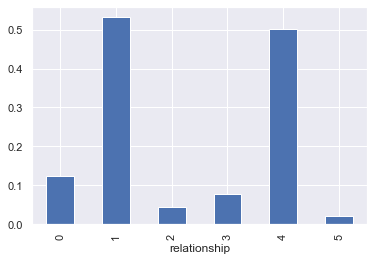

In [129]:
income_data.groupby('relationship').income.mean().plot(kind='bar')

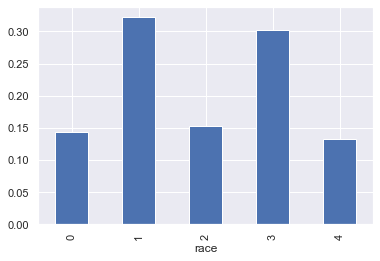

In [130]:
income_data.groupby('race').income.mean().plot(kind='bar')

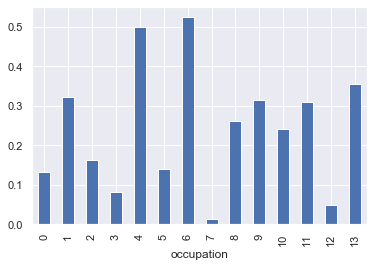

In [131]:
income_data.groupby('occupation').income.mean().plot(kind='bar')

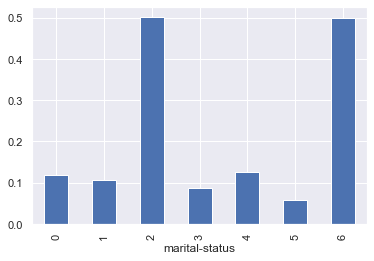

In [132]:
income_data.groupby('marital-status').income.mean().plot(kind='bar')

In [133]:
#income_data.groupby('Name').income.mean().plot(kind='bar')

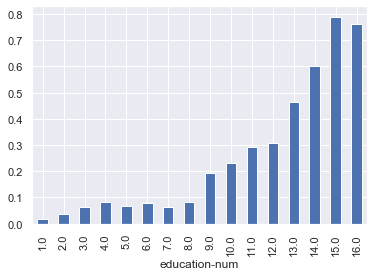

In [134]:
income_data.groupby('education-num').income.mean().plot(kind='bar')

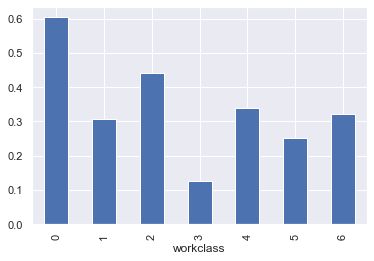

In [135]:
income_data.groupby('workclass').income.mean().plot(kind='bar')

In [136]:
df_income_x = pd.DataFrame(np.c_[income_data['relationship'], income_data['education_level'], income_data['race'],income_data['occupation'],income_data['sex'],income_data['marital-status'],income_data['workclass'], income_data['education-num']], columns = ['relationship','education_level','race','occupation','sex','marital-status','workclass', 'education-num'])
#concate using np.c_ for x-axis

df_income_y = pd.DataFrame(income_data.income) 
#y axis is dependent value

In [137]:
from sklearn.model_selection import train_test_split 
regression = LogisticRegression(solver='lbfgs')
#split data
x_train, x_test, y_train, y_test = train_test_split(df_income_x, df_income_y, test_size=0.33, random_state=42)

In [138]:
regression.fit(x_train, y_train)
#train model with training data

y_predict = regression.predict(x_test)
#get predictions

C:\Users\U090167\Python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
regression.predict([[1,7,3,7,0,2,0,1]])

array([0])

In [140]:
#accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.780498318820588


In [141]:
regression.predict([[1,7,3,6,0,2,0,11]])

array([1])

In [142]:
regression.predict([[1,7,3,7,0,2,0,11]])

array([1])

In [143]:
regression.predict([[1,7,3,9,0,2,0,11]])

array([1])

In [144]:
regression.predict([[1,7,3,6,0,2,0,3]])

array([0])

In [145]:
regression.predict([[1,7,3,6,0,2,1,3]])

array([0])

In [148]:
regression.predict([[1,7,3,6,1,2,0,3]])

array([0])

In [147]:
#accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.780498318820588
